In [1]:
import pandas as pd

In [6]:
#bookmark
# reading codebook
codebook_county_df=pd.read_excel('data/2019/SDOH_2019_Codebook_1_0.xlsx', sheet_name='County')
codebook_county_df.sample()

,Domain,SDOH Topic,Variable Name,Variable Label,Data Source,Type of Data (Numeric or Character),SAS Length,SAS Character,Position on the file,Unnamed: 9,Unnamed: 10
250,4. Physical infrastructure,Housing,ACS_PCT_RENTER_HU,Percentage of occupied housing units: rented,American Community Survey (ACS),num,8,6.2,251,NaN,NaN


In [7]:
#bookmark
# filtering healthcare context from codebook data
codebook_county_df[codebook_county_df['Domain']=='5. Healthcare context'].shape

(451, 11)

In [8]:
#bookmark
# creating list of all variables of healthcare context
list_health_context_county_vars =codebook_county_df[codebook_county_df['Domain']=='5. Healthcare context']['Variable Name'].to_list()
list_health_context_county_vars

['ACS_PCT_MEDICAID_ANY',
 'ACS_PCT_MEDICAID_ANY_BELOW64',
 'ACS_PCT_MEDICARE_ONLY',
 'ACS_PCT_OTHER_INS',
 'ACS_PCT_PVT_EMPL_DRCT',
 'ACS_PCT_PVT_EMPL_DRCT_BELOW64',
 'ACS_PCT_PRIVATE_ANY',
 'ACS_PCT_PRIVATE_ANY_BELOW64',
 'ACS_PCT_PRIVATE_EMPL',
 'ACS_PCT_PRIVATE_EMPL_BELOW64',
 'ACS_PCT_PRIVATE_MDCR',
 'ACS_PCT_PRIVATE_MDCR_35_64',
 'ACS_PCT_PRIVATE_OTHER',
 'ACS_PCT_PRIVATE_OTHER_BELOW64',
 'ACS_PCT_PRIVATE_SELF',
 'ACS_PCT_PRIVATE_SELF_BELOW64',
 'ACS_PCT_PUBLIC_ONLY',
 'ACS_PCT_PUBLIC_OTHER',
 'ACS_PCT_PUBLIC_OTHER_BELOW64',
 'ACS_PCT_SELF_MDCR_ABOVE35',
 'ACS_PCT_TRICARE_VA',
 'ACS_PCT_TRICARE_VA_BELOW64',
 'ACS_PCT_UNINSURED',
 'ACS_PCT_UNINSURED_BELOW64',
 'AHRF_HPSA_DENTIST',
 'AHRF_HPSA_MENTAL',
 'AHRF_HPSA_PRIM',
 'AHRF_HOSP_TEACHING',
 'AHRF_TOT_ARBRNE_ST_G_ISO_HOSPS',
 'AHRF_ARBRNE_ST_G_ISO_HOSPS_RATE',
 'AHRF_TOT_ARBRNE_ST_G_ISO_ROOMS',
 'AHRF_ARBRNE_ST_G_ISO_ROOMS_RATE',
 'AHRF_TOT_ARBRNE_STNGLT_ISO_ROOM',
 'AHRF_ARBRNE_STNGLT_ISO_ROOM_RATE',
 'AHRF_TOT_CARDIAC_IC_BEDS',

In [9]:
dict_feature_topic = pd.Series(codebook_county_df[codebook_county_df['Domain']=='5. Healthcare context']['SDOH Topic'].values,
                            index=codebook_county_df[codebook_county_df['Domain']=='5. Healthcare context']['Variable Name']).to_dict()

dict_feature_topic

{'ACS_PCT_MEDICAID_ANY': 'Health insurance status',
 'ACS_PCT_MEDICAID_ANY_BELOW64': 'Health insurance status',
 'ACS_PCT_MEDICARE_ONLY': 'Health insurance status',
 'ACS_PCT_OTHER_INS': 'Health insurance status',
 'ACS_PCT_PVT_EMPL_DRCT': 'Health insurance status',
 'ACS_PCT_PVT_EMPL_DRCT_BELOW64': 'Health insurance status',
 'ACS_PCT_PRIVATE_ANY': 'Health insurance status',
 'ACS_PCT_PRIVATE_ANY_BELOW64': 'Health insurance status',
 'ACS_PCT_PRIVATE_EMPL': 'Health insurance status',
 'ACS_PCT_PRIVATE_EMPL_BELOW64': 'Health insurance status',
 'ACS_PCT_PRIVATE_MDCR': 'Health insurance status',
 'ACS_PCT_PRIVATE_MDCR_35_64': 'Health insurance status',
 'ACS_PCT_PRIVATE_OTHER': 'Health insurance status',
 'ACS_PCT_PRIVATE_OTHER_BELOW64': 'Health insurance status',
 'ACS_PCT_PRIVATE_SELF': 'Health insurance status',
 'ACS_PCT_PRIVATE_SELF_BELOW64': 'Health insurance status',
 'ACS_PCT_PUBLIC_ONLY': 'Health insurance status',
 'ACS_PCT_PUBLIC_OTHER': 'Health insurance status',
 'ACS_PCT_P

In [16]:
# reading layout to create column name and description dictionary(to understand column names)
county_Layout_df=pd.read_excel('data/2019/SDOH_2019_Codebook_1_0.xlsx', sheet_name='County')

county_layout_filtered_df = county_Layout_df[county_Layout_df['Variable Name'].isin(list_health_context_county_vars)]
print(county_layout_filtered_df.shape)
#pd.Series(df.Letter.values,index=df.Position).to_dict()
dict_name_label = pd.Series(county_layout_filtered_df['Variable Label'].values, index=county_layout_filtered_df['Variable Name']).to_dict()
dict_name_label

(451, 11)


{'ACS_PCT_MEDICAID_ANY': 'Percentage of population with any Medicaid/means-tested public health insurance coverage',
 'ACS_PCT_MEDICAID_ANY_BELOW64': 'Percentage of population with any Medicaid/means-tested public health insurance coverage (ages 64 and below)',
 'ACS_PCT_MEDICARE_ONLY': 'Percentage of population with Medicare only',
 'ACS_PCT_OTHER_INS': 'Percentage of population with other health insurance coverage combinations',
 'ACS_PCT_PVT_EMPL_DRCT': 'Percentage of population with employer-based and direct-purchase coverage',
 'ACS_PCT_PVT_EMPL_DRCT_BELOW64': 'Percentage of population with employer-based and direct-purchase coverage (ages 64 and below)',
 'ACS_PCT_PRIVATE_ANY': 'Percentage of population with any private health insurance coverage',
 'ACS_PCT_PRIVATE_ANY_BELOW64': 'Percentage of population with any private health insurance coverage (ages 64 and below)',
 'ACS_PCT_PRIVATE_EMPL': 'Percentage of population with employer-based health insurance',
 'ACS_PCT_PRIVATE_EMPL_

In [28]:
county_df=pd.read_excel('data/2019/SDOH_2019_COUNTY_1_0.xlsx', sheet_name='Data')
county_df.sample()

,YEAR,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,...,POS_TOT_HOSP_AMBULANCE,POS_HOSP_AMBULANCE_RATE,POS_TOT_HOSP_CHEMO,POS_HOSP_CHEMO_RATE,POS_TOT_HOSP_ED,POS_HOSP_ED_RATE,POS_PCT_HOSP_FOR_PROFIT,POS_PCT_HOSP_NON_PROFIT,POS_PCT_HOSP_GOV,CEN_AIAN_NH_IND
2990,2019,53075,53,Washington,Whitman County,West,0,49231.0,48875.0,47141.0,...,0.0,0.0,1.0,0.02,3.0,0.06,60.0,6.67,33.33,1.0


In [26]:
#reading zipcode data
zipcode_df=pd.read_excel('data/2019/SDOH_2019_ZIPCODE_1_0.xlsx', sheet_name='Data')
zipcode_df.sample()

,YEAR,STATEFIPS,ZIPCODE,ZCTA,STATE,REGION,TERRITORY,POINT_ZIP,ACS_TOT_POP_WT_ZC,ACS_TOT_POP_US_ABOVE1_ZC,...,CDCP_NO_PHY_ACTV_ADULT_C_ZC,CDCP_PULMONARY_ADULT_C_ZC,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP,CEN_AIAN_NH_IND
25071,2019,30,59330,59330.0,Montana,West,0,0,8499.0,8467.0,...,23.7,7.0,1.28,1.28,72.84,49.39,1.28,1.35,49.39,0.0


In [18]:
# zipcode_df = zipcode_df.set_index('ZIPCODE')
# zipcode_df.sample()

In [19]:
# # getting df with healthcare context variables from zipcode data 
# zipcode_health_df = zipcode_df[list_health_context_zipcode_vars] 
# zipcode_health_df.sample()

In [20]:
# zipcode_health_df.iloc[0]

In [21]:
# zipcode_health_df.describe()

In [22]:
# zipcode_health_df.shape

In [24]:
# codebook_county_df.isna().sum()*100/codebook_county_df.shape[0]

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def missing_values_analysis(df, other_missing_values=[], plot=True, figsize=(15,10)):
    df = df.copy()
    for mv in other_missing_values:
        for col in df.columns:
            df[col] = np.where(df[col]==mv, np.nan, df[col])

    all_missing_values = pd.DataFrame()
    all_missing_values['Missing_Values'] = df.isna().sum()
    all_missing_values['% Missing_Values'] = round(df.isna().sum()*100/df.shape[0],2)    
    
    if plot:
        missing_values = all_missing_values[all_missing_values['Missing_Values']>0]['% Missing_Values'].sort_values(ascending=True)

        objects = missing_values.index
        y_pos = np.arange(len(objects))
        count = missing_values.values

        plt.figure(figsize=figsize)
        plt.barh(y_pos, count, align='center', alpha=0.9)
        plt.yticks(y_pos, objects)
        plt.ylabel('col names')
        plt.title('Missing values')

        plt.show()
        set_display_options()
    
    print("Total Claims: ", df.shape[0])
    print('-'*40)
    return all_missing_values.sort_values(by='Missing_Values',ascending=False)

In [56]:
#bookmark
missing_values_analysis(zipcode_health_df, other_missing_values=[], plot=False, figsize=(15,10))

Total Claims:  41073
----------------------------------------


,Missing_Values,% Missing_Values
POS_DIST_PED_ICU_ZP,1686,4.10
POS_DIST_TRAUMA_ZP,1635,3.98
POS_DIST_MEDSURG_ICU_ZP,1633,3.98
POS_DIST_ALC_ZP,1631,3.97
POS_DIST_OBSTETRICS_ZP,1631,3.97
POS_DIST_ED_ZP,1631,3.97
POS_DIST_CLINIC_ZP,1626,3.96
CDCP_NO_PHY_ACTV_ADULT_C_ZC,1485,3.62
CDCP_ARTHRITIS_ADULT_C_ZC,1485,3.62
CDCP_CHOLES_ADULT_C_ZC,1485,3.62


In [58]:
#bookmark
zipcode_health_df.sample(10)

,ACS_PCT_MEDICAID_ANY_ZC,ACS_PCT_MEDICAID_ANY_BELOW64_ZC,ACS_PCT_MEDICARE_ONLY_ZC,ACS_PCT_OTHER_INS_ZC,ACS_PCT_PVT_EMPL_DRCT_ZC,ACS_PCT_PVT_EMPL_DRCT_BELOW64_ZC,ACS_PCT_PRIVATE_ANY_ZC,ACS_PCT_PRIVATE_ANY_BELOW64_ZC,ACS_PCT_PRIVATE_EMPL_ZC,ACS_PCT_PRIVATE_EMPL_BELOW64_ZC,...,CDCP_KIDNEY_DISEASE_ADULT_C_ZC,CDCP_NO_PHY_ACTV_ADULT_C_ZC,CDCP_PULMONARY_ADULT_C_ZC,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
8723,12.29,13.91,5.31,5.03,0.66,0.81,71.35,75.85,53.06,64.56,...,NaN,NaN,NaN,2.43,2.43,13.10,13.10,2.43,2.40,13.10
26366,29.41,34.44,5.49,7.54,1.22,1.45,48.60,49.76,36.24,43.95,...,3.6,35.8,11.8,1.48,6.58,6.58,32.90,6.58,0.57,16.81
60179,4.84,5.19,4.05,2.80,1.03,1.19,86.80,91.47,70.93,81.78,...,1.9,18.0,4.0,4.43,4.43,5.43,24.67,4.43,2.17,4.78
99802,10.51,11.27,2.48,7.86,2.33,2.67,65.88,68.02,52.30,59.64,...,2.3,16.5,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11739,2.51,2.85,2.51,4.91,1.53,1.74,88.97,93.55,72.82,82.75,...,2.3,19.4,4.9,4.34,4.34,5.15,7.00,4.34,4.28,7.59
56279,15.03,17.07,4.65,5.65,0.57,0.41,68.65,70.65,53.33,61.17,...,2.4,18.5,4.9,8.62,8.62,8.62,44.14,8.62,8.09,44.14
97711,34.38,54.55,15.63,0.00,0.00,0.00,40.63,36.36,6.25,18.18,...,3.8,28.5,9.0,19.50,19.50,19.50,104.79,19.50,19.54,28.77
54961,14.12,15.97,7.05,5.43,1.78,2.12,66.06,71.67,52.67,62.53,...,2.7,24.6,6.1,1.61,1.61,19.73,20.29,1.61,16.00,19.73
57273,17.34,21.14,11.20,4.40,0.33,0.43,37.84,37.22,20.00,25.67,...,3.6,34.3,7.6,10.56,10.56,10.56,69.73,11.65,0.98,11.65


In [59]:
zipcode_health_df.iloc[0]

ACS_PCT_MEDICAID_ANY_ZC                NaN
ACS_PCT_MEDICAID_ANY_BELOW64_ZC        NaN
ACS_PCT_MEDICARE_ONLY_ZC               NaN
ACS_PCT_OTHER_INS_ZC                   NaN
ACS_PCT_PVT_EMPL_DRCT_ZC               NaN
ACS_PCT_PVT_EMPL_DRCT_BELOW64_ZC       NaN
ACS_PCT_PRIVATE_ANY_ZC                 NaN
ACS_PCT_PRIVATE_ANY_BELOW64_ZC         NaN
ACS_PCT_PRIVATE_EMPL_ZC                NaN
ACS_PCT_PRIVATE_EMPL_BELOW64_ZC        NaN
ACS_PCT_PRIVATE_MDCR_ZC                NaN
ACS_PCT_PRIVATE_MDCR_35_64_ZC          NaN
ACS_PCT_PRIVATE_OTHER_ZC               NaN
ACS_PCT_PRIVATE_OTHER_BELOW64_ZC       NaN
ACS_PCT_PRIVATE_SELF_ZC                NaN
ACS_PCT_PRIVATE_SELF_BELOW64_ZC        NaN
ACS_PCT_PUBLIC_ONLY_ZC                 NaN
ACS_PCT_PUBLIC_OTHER_ZC                NaN
ACS_PCT_PUBLIC_OTHER_BELOW64_ZC        NaN
ACS_PCT_SELF_MDCR_ABOVE35_ZC           NaN
ACS_PCT_TRICARE_VA_ZC                  NaN
ACS_PCT_TRICARE_VA_BELOW64_ZC          NaN
ACS_PCT_UNINSURED_ZC                   NaN
ACS_PCT_UNI

In [61]:
#bookmark

# deleting NaN rows
zipcode_health_df = zipcode_health_df.dropna(axis=0, how='any')
zipcode_health_df.shape

(37832, 40)

# Apply PCA

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [63]:
#bookmark

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(zipcode_health_df)

In [65]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [66]:
pca.explained_variance_ratio_

array([2.35086840e-01, 1.29296622e-01, 1.01624001e-01, 7.28309705e-02,
       5.48369990e-02, 4.78840342e-02, 4.42530282e-02, 3.40166278e-02,
       3.12525122e-02, 2.95103319e-02, 2.45284577e-02, 2.43015194e-02,
       2.13387979e-02, 1.98846716e-02, 1.71836224e-02, 1.66026792e-02,
       1.39921546e-02, 1.25474965e-02, 1.22550519e-02, 1.05668600e-02,
       9.89347460e-03, 8.16737402e-03, 6.09818833e-03, 4.87211762e-03,
       3.40725603e-03, 2.90467245e-03, 2.63888108e-03, 2.41991716e-03,
       1.46695795e-03, 1.21953690e-03, 7.43869472e-04, 5.96212700e-04,
       5.39860012e-04, 4.83356432e-04, 4.32150602e-04, 3.22886805e-04,
       5.54558618e-09, 2.02438825e-09, 1.56428914e-09, 1.02807369e-32])

In [69]:
pca.explained_variance_ratio_.cumsum()

array([0.23508684, 0.36438346, 0.46600746, 0.53883843, 0.59367543,
       0.64155947, 0.6858125 , 0.71982912, 0.75108164, 0.78059197,
       0.80512043, 0.82942194, 0.85076074, 0.87064541, 0.88782904,
       0.90443172, 0.91842387, 0.93097137, 0.94322642, 0.95379328,
       0.96368675, 0.97185413, 0.97795232, 0.98282443, 0.98623169,
       0.98913636, 0.99177524, 0.99419516, 0.99566212, 0.99688165,
       0.99762552, 0.99822174, 0.9987616 , 0.99924495, 0.9996771 ,
       0.99999999, 1.        , 1.        , 1.        , 1.        ])

Text(0, 0.5, 'cumulative explained variance')

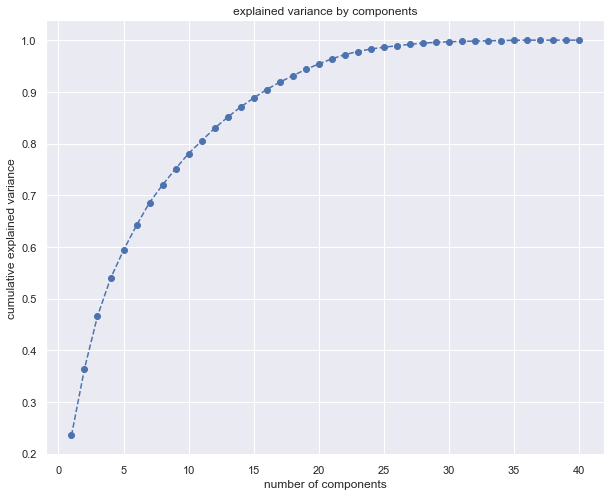

In [70]:
#bookmark

plt.figure(figsize=(10,8))
plt.plot(range(1,41), pca.explained_variance_ratio_.cumsum(),
        marker='o', linestyle= '--')
plt.title("explained variance by components")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [71]:
pca = PCA(n_components=11)
pca.fit(segmentation_std)

PCA(n_components=11)

In [72]:
pca.transform(segmentation_std)

array([[-1.16714194, -0.38670035, -2.01376158, ..., -0.42581983,
        -0.02879501,  0.1839443 ],
       [-3.30232528,  1.77532203,  1.21981552, ...,  1.31579536,
         0.65237301, -0.09384702],
       [-3.40257699,  1.93715109,  0.93867284, ...,  1.3424307 ,
         0.65479171, -0.08338956],
       ...,
       [ 3.6276588 , -6.48631568, 11.17370408, ..., -0.31986939,
         1.41705938,  1.14905667],
       [ 5.97063017, -5.28463263, 12.06342131, ..., -1.14784171,
         0.99398208,  1.25422993],
       [ 3.5942917 , -5.21505924, 14.04690349, ..., -0.41153121,
         0.89696142,  0.82926755]])

In [73]:
score_pca = pca.transform(segmentation_std)

## KMeans with PCA

In [77]:
#bookmark

# find k with the help of elbow method

#Within-Cluster Sum of Square
wcss = []

for i in range(1,30):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

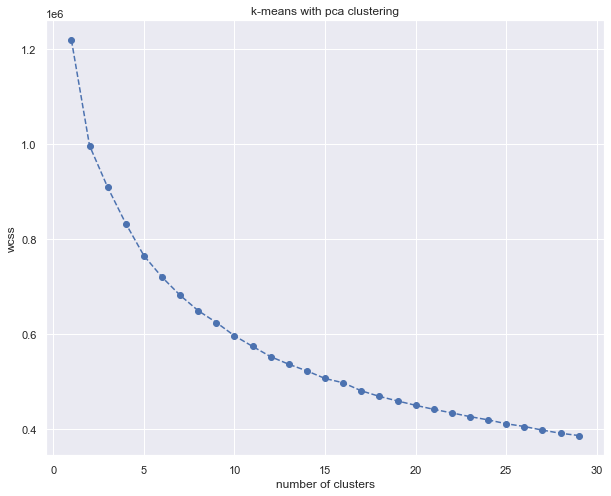

In [78]:
plt.figure(figsize = (10,8))
plt.plot(range(1,30), wcss, marker = 'o', linestyle = '--')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('k-means with pca clustering')
plt.show()

In [80]:
#bookmark

# as of now lets consider 20 clusters
# run k-means
#aplly k-means
kmeans_pca = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)

In [82]:
# fitting data with the k-means pca model
kmeans_pca.fit(score_pca)

KMeans(n_clusters=20, random_state=42)

In [90]:
#bookmark

# concating result with zipcode data
df_segm_pca_kmeans = pd.concat([zipcode_health_df.reset_index(), 
                                pd.DataFrame(score_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-11:] = [f'component_{i}' for i in range(1,12)]
df_segm_pca_kmeans['cluster_number'] = kmeans_pca.labels_
df_segm_pca_kmeans = df_segm_pca_kmeans.set_index('ZIPCODE')
df_segm_pca_kmeans.head()

,ACS_PCT_MEDICAID_ANY_ZC,ACS_PCT_MEDICAID_ANY_BELOW64_ZC,ACS_PCT_MEDICARE_ONLY_ZC,ACS_PCT_OTHER_INS_ZC,ACS_PCT_PVT_EMPL_DRCT_ZC,ACS_PCT_PVT_EMPL_DRCT_BELOW64_ZC,ACS_PCT_PRIVATE_ANY_ZC,ACS_PCT_PRIVATE_ANY_BELOW64_ZC,ACS_PCT_PRIVATE_EMPL_ZC,ACS_PCT_PRIVATE_EMPL_BELOW64_ZC,...,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,cluster_number
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
1001,17.02,21.08,4.19,7.95,1.92,2.46,65.95,67.05,45.69,57.78,...,-2.013762,0.565509,0.153928,0.741018,0.212821,-0.278897,-0.425820,-0.028795,0.183944,19
1059,14.47,16.01,2.33,6.09,3.68,4.24,73.80,76.56,52.93,59.76,...,1.219816,-1.460507,0.494316,2.357584,0.909271,-0.677568,1.315795,0.652373,-0.093847,18
1002,14.47,16.01,2.33,6.09,3.68,4.24,73.80,76.56,52.93,59.76,...,0.938673,-1.425431,0.382810,2.340390,0.894523,-0.669772,1.342431,0.654792,-0.083390,18
1004,14.47,16.01,2.33,6.09,3.68,4.24,73.80,76.56,52.93,59.76,...,0.870457,-1.415861,0.358174,2.333528,0.891637,-0.667266,1.347396,0.655771,-0.080840,18
1003,7.82,7.82,0.13,2.58,2.47,2.43,85.58,85.57,66.85,66.87,...,4.658125,-4.394356,1.654048,2.164298,2.061757,-1.864272,6.199663,0.724072,-1.137652,4


## feature_importance

In [144]:
#bookmark
df_feature_importance = pd.DataFrame(pca.components_,columns=zipcode_health_df.columns,index = [f'component_{i}' for i in range(1,12)])
df_feature_importance

,ACS_PCT_MEDICAID_ANY_ZC,ACS_PCT_MEDICAID_ANY_BELOW64_ZC,ACS_PCT_MEDICARE_ONLY_ZC,ACS_PCT_OTHER_INS_ZC,ACS_PCT_PVT_EMPL_DRCT_ZC,ACS_PCT_PVT_EMPL_DRCT_BELOW64_ZC,ACS_PCT_PRIVATE_ANY_ZC,ACS_PCT_PRIVATE_ANY_BELOW64_ZC,ACS_PCT_PRIVATE_EMPL_ZC,ACS_PCT_PRIVATE_EMPL_BELOW64_ZC,...,CDCP_KIDNEY_DISEASE_ADULT_C_ZC,CDCP_NO_PHY_ACTV_ADULT_C_ZC,CDCP_PULMONARY_ADULT_C_ZC,POS_DIST_ED_ZP,POS_DIST_MEDSURG_ICU_ZP,POS_DIST_TRAUMA_ZP,POS_DIST_PED_ICU_ZP,POS_DIST_OBSTETRICS_ZP,POS_DIST_CLINIC_ZP,POS_DIST_ALC_ZP
component_1,0.232303,0.240740,0.104925,0.052939,-0.077336,-0.065259,-0.285772,-0.280835,-0.268821,-0.257382,...,0.266114,0.242278,0.260484,0.122962,0.129087,0.137257,0.130792,0.142326,0.051226,0.131374
component_2,0.188006,0.158332,-0.118147,-0.092395,-0.010919,-0.030728,-0.180028,-0.194949,-0.079596,-0.160133,...,-0.091865,0.024863,-0.117849,-0.183150,-0.157489,-0.160650,-0.142617,-0.193402,-0.160272,-0.156049
component_3,-0.093509,-0.099738,-0.050374,-0.039019,0.027781,0.022551,0.007328,0.001828,-0.038838,-0.060672,...,-0.124132,-0.118802,-0.123644,0.333234,0.322253,0.236477,0.287450,0.302616,0.279395,0.261411
component_4,-0.106776,-0.079069,0.061694,0.210876,-0.066585,-0.050119,-0.011540,0.006523,-0.053790,0.002955,...,0.010929,-0.024075,0.057642,-0.052445,-0.068096,0.013460,-0.038009,-0.034174,-0.041783,-0.018047
component_5,0.127133,0.120492,-0.135363,-0.027419,-0.173835,-0.184356,0.051747,0.032267,0.296616,0.276775,...,-0.078997,-0.011098,0.015443,0.127897,0.124390,0.104913,0.083894,0.110975,0.115108,0.041696
component_6,0.104182,0.106426,-0.052346,0.047091,0.633631,0.634684,0.027637,0.021759,-0.023703,-0.037167,...,0.009894,0.051283,0.049397,0.021572,0.029771,0.048151,0.039255,0.028306,-0.009980,0.036298
component_7,0.237957,0.260481,0.043797,0.021109,-0.190896,-0.192963,0.017125,0.024549,-0.091681,-0.078884,...,-0.037748,-0.122216,-0.063890,0.016663,0.011052,0.006639,0.028256,0.008006,0.020062,0.027925
component_8,-0.050719,-0.036785,0.083699,0.015962,0.071514,0.082743,-0.062661,-0.053807,-0.015445,0.015616,...,-0.061869,-0.162827,-0.113009,-0.000494,-0.015140,-0.045522,-0.018860,-0.014568,0.015458,0.015511
component_9,-0.126842,-0.157481,-0.236473,-0.070237,-0.067860,-0.090834,0.152552,0.122418,0.110859,0.064060,...,0.072256,0.313854,0.252771,-0.045482,-0.034983,0.038652,0.015444,-0.018935,-0.060837,-0.001385
component_10,-0.022759,0.002650,-0.025760,0.108717,-0.015286,-0.010213,-0.027023,-0.047122,-0.126463,-0.102037,...,-0.073431,-0.115921,-0.062063,0.002266,-0.011783,0.006922,-0.007908,-0.005830,-0.004420,-0.013884


In [161]:
df_feature_importance.transpose()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11
ACS_PCT_MEDICAID_ANY_ZC,0.232303,0.188006,-0.093509,-0.106776,0.127133,0.104182,0.237957,-0.050719,-0.126842,-0.022759,0.131641
ACS_PCT_MEDICAID_ANY_BELOW64_ZC,0.240740,0.158332,-0.099738,-0.079069,0.120492,0.106426,0.260481,-0.036785,-0.157481,0.002650,0.137904
ACS_PCT_MEDICARE_ONLY_ZC,0.104925,-0.118147,-0.050374,0.061694,-0.135363,-0.052346,0.043797,0.083699,-0.236473,-0.025760,-0.313454
ACS_PCT_OTHER_INS_ZC,0.052939,-0.092395,-0.039019,0.210876,-0.027419,0.047091,0.021109,0.015962,-0.070237,0.108717,0.390670
ACS_PCT_PVT_EMPL_DRCT_ZC,-0.077336,-0.010919,0.027781,-0.066585,-0.173835,0.633631,-0.190896,0.071514,-0.067860,-0.015286,-0.018452
ACS_PCT_PVT_EMPL_DRCT_BELOW64_ZC,-0.065259,-0.030728,0.022551,-0.050119,-0.184356,0.634684,-0.192963,0.082743,-0.090834,-0.010213,-0.022464
ACS_PCT_PRIVATE_ANY_ZC,-0.285772,-0.180028,0.007328,-0.011540,0.051747,0.027637,0.017125,-0.062661,0.152552,-0.027023,-0.011930
ACS_PCT_PRIVATE_ANY_BELOW64_ZC,-0.280835,-0.194949,0.001828,0.006523,0.032267,0.021759,0.024549,-0.053807,0.122418,-0.047122,-0.051857
ACS_PCT_PRIVATE_EMPL_ZC,-0.268821,-0.079596,-0.038838,-0.053790,0.296616,-0.023703,-0.091681,-0.015445,0.110859,-0.126463,-0.062603
ACS_PCT_PRIVATE_EMPL_BELOW64_ZC,-0.257382,-0.160133,-0.060672,0.002955,0.276775,-0.037167,-0.078884,0.015616,0.064060,-0.102037,-0.078422


In [178]:
df_feature_importance.stack().to_frame().reset_index()

,level_0,level_1,0
0,component_1,ACS_PCT_MEDICAID_ANY_ZC,0.232303
1,component_1,ACS_PCT_MEDICAID_ANY_BELOW64_ZC,0.240740
2,component_1,ACS_PCT_MEDICARE_ONLY_ZC,0.104925
3,component_1,ACS_PCT_OTHER_INS_ZC,0.052939
4,component_1,ACS_PCT_PVT_EMPL_DRCT_ZC,-0.077336
...,...,...,...
435,component_11,POS_DIST_TRAUMA_ZP,-0.022179
436,component_11,POS_DIST_PED_ICU_ZP,0.058357
437,component_11,POS_DIST_OBSTETRICS_ZP,-0.033142
438,component_11,POS_DIST_CLINIC_ZP,-0.014546


In [185]:
df_temp = df_feature_importance.stack().to_frame().sort_values(by=0, ascending=False)
#df_temp['health_features_description'] = df_imp_features['health_features'].apply(lambda feature: dict_name_label[feature])

df_temp = df_temp.reset_index()
df_temp = df_temp.rename(columns={'level_0':'PC', 'level_1':'feature', 0:'cov'})
df_temp['features_description'] = df_temp['feature'].apply(lambda feature: dict_name_label[feature])
df_temp['features_topic'] = df_temp['feature'].apply(lambda feature: dict_feature_topic[feature])

df_temp

,PC,feature,cov,features_description,features_topic
0,component_10,ACS_PCT_PRIVATE_MDCR_35_64_ZC,0.729103,Percentage of population with direct-purchase ...,Health insurance status
1,component_6,ACS_PCT_PVT_EMPL_DRCT_BELOW64_ZC,0.634684,Percentage of population with employer-based a...,Health insurance status
2,component_6,ACS_PCT_PVT_EMPL_DRCT_ZC,0.633631,Percentage of population with employer-based a...,Health insurance status
3,component_8,ACS_PCT_PUBLIC_OTHER_BELOW64_ZC,0.620574,Percentage of population with other public-onl...,Health insurance status
4,component_8,ACS_PCT_PUBLIC_OTHER_ZC,0.610573,Percentage of population with other public-onl...,Health insurance status
...,...,...,...,...,...
435,component_11,ACS_PCT_TRICARE_VA_BELOW64_ZC,-0.413554,Percentage of population with TRICARE/military...,Health insurance status
436,component_7,ACS_PCT_UNINSURED_BELOW64_ZC,-0.465967,Percentage of population with no health insura...,Health insurance status
437,component_7,ACS_PCT_UNINSURED_ZC,-0.466334,Percentage of population with no health insura...,Health insurance status
438,component_5,ACS_PCT_PRIVATE_SELF_ZC,-0.473328,Percentage of population with direct-purchase ...,Health insurance status


In [153]:
# df_feature_importance.transpose().to_csv("pca_components.csv")

In [159]:
df_feature_importance.transpose().nlargest(3, 'component_1').component_1

CDCP_KIDNEY_DISEASE_ADULT_C_ZC    0.266114
CDCP_PULMONARY_ADULT_C_ZC         0.260484
ACS_PCT_PUBLIC_ONLY_ZC            0.254033
Name: component_1, dtype: float64

In [160]:
df_feature_importance.transpose().nsmallest(3, 'component_1').component_1

ACS_PCT_PRIVATE_ANY_ZC           -0.285772
ACS_PCT_PRIVATE_ANY_BELOW64_ZC   -0.280835
ACS_PCT_PRIVATE_EMPL_ZC          -0.268821
Name: component_1, dtype: float64

In [186]:
df_imp_features = df_feature_importance.abs().sum(axis = 0).sort_values(ascending=False).to_frame()
df_imp_features = df_imp_features.reset_index()
df_imp_features = df_imp_features.rename(columns = {'index':'health_features',
                                                    0: 'importance_score'})
df_imp_features['health_features_description'] = df_imp_features['health_features'].apply(lambda feature: dict_name_label[feature])
df_imp_features['features_topic'] = df_imp_features['health_features'].apply(lambda feature: dict_feature_topic[feature])
df_imp_features = df_imp_features.set_index('health_features')
df_imp_features

,importance_score,health_features_description,features_topic
health_features,,,
ACS_PCT_PRIVATE_SELF_ZC,1.606324,Percentage of population with direct-purchase ...,Health insurance status
ACS_PCT_UNINSURED_ZC,1.585878,Percentage of population with no health insura...,Health insurance status
ACS_PCT_UNINSURED_BELOW64_ZC,1.579099,Percentage of population with no health insura...,Health insurance status
ACS_PCT_PRIVATE_SELF_BELOW64_ZC,1.572039,Percentage of population with direct-purchase ...,Health insurance status
ACS_PCT_PRIVATE_OTHER_BELOW64_ZC,1.533405,Percentage of population with other private-on...,Health insurance status
ACS_PCT_PRIVATE_OTHER_ZC,1.521198,Percentage of population with other private-on...,Health insurance status
ACS_PCT_MEDICAID_ANY_ZC,1.421827,Percentage of population with any Medicaid/mea...,Health insurance status
CDCP_ASTHMA_ADULT_C_ZC,1.417256,Crude prevalence of current asthma among adult...,Health Outcomes
ACS_PCT_MEDICAID_ANY_BELOW64_ZC,1.400098,Percentage of population with any Medicaid/mea...,Health insurance status


In [150]:
dict_name_label['ACS_PCT_PUBLIC_OTHER_BELOW64_ZC']

'Percentage of population with other public-only health insurance combinations (ages 64 and below, ZCTA level)'

In [151]:
# recale from range 0-100 county_health_df
# create 4 models K means n dbscn with n without scaling

# merge results with demographic data for AT&T

In [100]:
demographic_df = pd.read_csv('data/SDoH_Demographics.csv', error_bad_lines=False)
#demographic_df.()

b'Skipping line 7506498: expected 36 fields, saw 37\n'
b'Skipping line 10527499: expected 36 fields, saw 37\n'
C:\Users\A1053076\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [101]:
demographic_df.sample()

,udp_global_id,client_id,age,gender,marital_status,is_union,primary_language_code,country_description,county,state,...,rehire_date,is_rehire,hire_date_calc_tenure,termination_date,base_pay_regular_payrate_amount,base_pay_regular_frequency_code,base_pay_regular_frequency_description,base_pay_regular_expectedannualsalary,base_pay_regular_expectedannualsalary_range,annual_benefits_base_rate
11506973,5904a9c4dab54b31271572ba,1698,66.0,F,S,N,NaN,United States of America,NaN,KS,...,NaN,N,NaN,2299-12-31,37000.0,A1,Annual,37000.0,"$20,000-$39,999",NaN


In [111]:
demographic_df.columns

Index(['udp_global_id', 'client_id', 'age', 'gender', 'marital_status',
       'is_union', 'primary_language_code', 'country_description', 'county',
       'state', 'postal_code', 'postal_code_extension',
       'platform_indicator_code', 'mapped_employment_status_code',
       'mapped_employment_status_description', 'mapped_fullpart_code',
       'mapped_fullpart_description', 'mapped_permanent_temporary_code',
       'mapped_permanent_temporary_description', 'mapped_hourly_salary_code',
       'mapped_hourly_salary_description', 'subsidiary_code',
       'subsidiary_description', 'mapped_flex_status_code',
       'mapped_flex_status_description', 'original_hire_date', 'rehire_date',
       'is_rehire', 'hire_date_calc_tenure', 'termination_date',
       'base_pay_regular_payrate_amount', 'base_pay_regular_frequency_code',
       'base_pay_regular_frequency_description',
       'base_pay_regular_expectedannualsalary',
       'base_pay_regular_expectedannualsalary_range',
       'annua

In [102]:
demographic_df.shape

(12115563, 36)

In [103]:
# AT&T client ID = 3349 
demographic_df = demographic_df[demographic_df['client_id']==3349]
demographic_df.shape

(348950, 36)

In [120]:
demographic_df['postal_code']=pd.to_numeric(demographic_df['postal_code'])


In [109]:
# df_segm_pca_kmeans = df_segm_pca_kmeans.reset_index()
df_segm_pca_kmeans[['ZIPCODE']+[f'component_{i}' for i in range(1,12)]+['cluster_number']]

,ZIPCODE,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,cluster_number
0,1001,-1.167142,-0.386700,-2.013762,0.565509,0.153928,0.741018,0.212821,-0.278897,-0.425820,-0.028795,0.183944,19
1,1059,-3.302325,1.775322,1.219816,-1.460507,0.494316,2.357584,0.909271,-0.677568,1.315795,0.652373,-0.093847,18
2,1002,-3.402577,1.937151,0.938673,-1.425431,0.382810,2.340390,0.894523,-0.669772,1.342431,0.654792,-0.083390,18
3,1004,-3.432680,1.975914,0.870457,-1.415861,0.358174,2.333528,0.891637,-0.667266,1.347396,0.655771,-0.080840,18
4,1003,-6.200596,7.043743,4.658125,-4.394356,1.654048,2.164298,2.061757,-1.864272,6.199663,0.724072,-1.137652,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37827,99832,3.403253,-7.623826,12.656371,-1.312627,3.594728,0.217632,2.231499,-0.690151,-0.953197,-0.620446,0.276294,9
37828,99825,3.403253,-7.623826,12.656371,-1.312627,3.594728,0.217632,2.231499,-0.690151,-0.953197,-0.620446,0.276294,9
37829,99826,3.627659,-6.486316,11.173704,-1.280055,2.912381,1.125954,1.386302,-1.013427,-0.319869,1.417059,1.149057,9
37830,99827,5.970630,-5.284633,12.063421,-2.444834,1.713593,1.379317,1.805400,0.478354,-1.147842,0.993982,1.254230,9


In [121]:
final_df = demographic_df.merge(df_segm_pca_kmeans[['ZIPCODE']+[f'component_{i}' for i in range(1,12)]+['cluster_number']], 
                                how='left', left_on = 'postal_code', right_on = 'ZIPCODE')
#final_df = final_df.drop(['ZIPCODE'],axis=1)

In [122]:
final_df.head()

,udp_global_id,client_id,age,gender,marital_status,is_union,primary_language_code,country_description,county,state,...,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,cluster_number
0,58a38f42042fec2f0718169d,3349,76.0,M,M,N,NaN,United States of America,NaN,AZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58a39a737f8f0502c9826b56,3349,53.0,M,M,N,NaN,United States of America,NaN,AR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58a38e3ff7a4410c1581e2ec,3349,81.0,M,M,N,NaN,United States of America,NaN,FL,...,-3.137036,2.871160,-2.301501,-0.871296,-0.094022,0.944175,-1.223177,0.528486,0.538260,17.0
3,58a3986af7a4410c15838455,3349,84.0,M,S,N,NaN,United States of America,NaN,TX,...,2.195979,0.175907,-0.966155,-0.424996,-1.317142,-0.091008,-0.202231,-0.435153,0.777233,15.0
4,58a39a1a7f8f0502c982343a,3349,72.0,M,M,N,NaN,United States of America,NaN,MI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
final_df.shape

(348950, 49)

In [126]:
final_df[~final_df['cluster_number'].isna()].shape

(154358, 49)

In [128]:
final_df = final_df[~final_df['cluster_number'].isna()]
final_df.head()

,udp_global_id,client_id,age,gender,marital_status,is_union,primary_language_code,country_description,county,state,...,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,cluster_number
2,58a38e3ff7a4410c1581e2ec,3349,81.0,M,M,N,NaN,United States of America,NaN,FL,...,-3.137036,2.871160,-2.301501,-0.871296,-0.094022,0.944175,-1.223177,0.528486,0.538260,17.0
3,58a3986af7a4410c15838455,3349,84.0,M,S,N,NaN,United States of America,NaN,TX,...,2.195979,0.175907,-0.966155,-0.424996,-1.317142,-0.091008,-0.202231,-0.435153,0.777233,15.0
6,603ed138dab54b0b05f45411,3349,39.0,M,M,N,NaN,United States of America,NaN,FL,...,1.784651,-1.170927,-3.166771,-1.054010,1.785183,-0.646039,-0.569757,-0.094555,0.003407,18.0
7,5d15e02bdab54b361decd193,3349,59.0,M,M,N,NaN,United States of America,NaN,NY,...,-1.802587,0.113433,0.779487,-0.027599,-0.373770,0.089761,-0.508411,0.015103,-0.250115,7.0
11,58a38f897f8f0502c98132ad,3349,86.0,M,M,N,NaN,United States of America,NaN,NY,...,-1.104711,-0.944351,0.186310,-0.162781,0.708723,-0.079095,-0.706070,0.048859,-0.123688,16.0


In [187]:
with pd.ExcelWriter('ATT_health_Score_Test_results_v2.xlsx') as writer:  
    final_df.to_excel(writer, sheet_name='cluster_result', index=False)
    
    df_imp_features.reset_index().to_excel(writer, sheet_name='imp_f_cov_abs_sum', index=False)
    df_temp.reset_index().to_excel(writer, sheet_name='imp_f_by_cov', index=False)
    
    df_feature_importance.reset_index().to_excel(writer, sheet_name='pca_components_matrix', index=False)
    df_feature_importance.transpose().reset_index().to_excel(writer, sheet_name='pca_components_matrix_T', index=False)